### Imports Usados

In [744]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

### Função function(t) e sua derivada

In [745]:
def sinc(x):
    if(x == 0): return 1                # divisao por zero
    else:       return math.sin(x)/x 

def sinc_linha(x):
    return (x*math.cos(x) - math.sin(x))/x**2

### Critérios de parada para todos os métodos

In [746]:
# interacoes maximas
max_iter = 100

# erro erro_toleradorado
error = 1e-6

# convergencia 
converge = 1e-6

# raizes
r1 = math.pi
r2 = 2*math.pi

### Plot da função com x entre [0.1, 8]

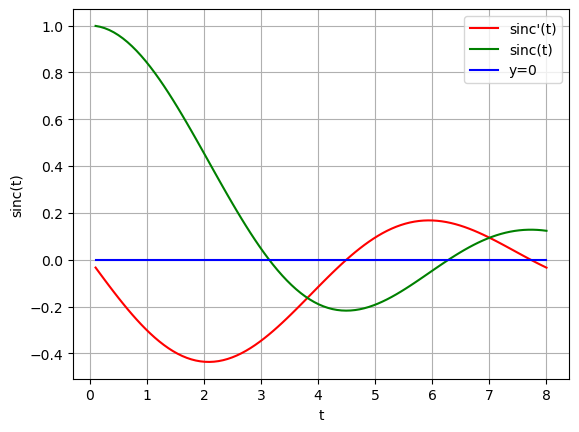

In [747]:
x = np.linspace(0.1, 8, 100)
y0 = np.zeros(100)
y1 = [sinc(i) for i in x]
y2 = [sinc_linha(i) for i in x]

plt.plot(x, y2, 'r')
plt.plot(x, y1, 'g')
plt.plot(x, y0, 'b')
plt.xlabel('t')
plt.ylabel('sinc(t)')
plt.grid(True)
plt.legend(['sinc\'(t)', 'sinc(t)', 'y=0'])
plt.show()

### Função para plotar os dados

In [748]:
def plot(error_arr, values_arr):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Erro
    ax1.plot([i for i in range(len(error_arr))], error_arr, color='b')
    ax1.set_title('Erro')
    ax1.grid()

    # solucoes
    ax2.plot([i for i in range(len(values_arr))], values_arr, color='r')
    ax2.set_title('Raiz')
    ax2.grid()

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

# --- MÉTODO DA BISSECÇÃO ---

### Intervalo que contêm uma raiz

In [749]:
init    = 3.0
end     = 3.5

### Aplicando o método da bissecção para achar a raiz

In [750]:
def bisection(init, end, function):
    # precisao de maquina 
    eps = sys.float_info.epsilon

    # se colocar invertido meu algoritmo buga, teria q mudar a ordem
    if(init >= end):
        print("Intervalo invalido: [{:.3f}, {:.3f}]".format(init, end))

    if(function(init) * function(end) > 0):  
        print("O intervalo nao passa no teorema de Bolzano.")

    if(abs(function(init)) < eps):  
        print("Init esta muito proximo de zero.")                
        print("Raiz em x:", init)
    if(abs(function(end)) < eps):                   
        print("End esta muito proximo de zero")
        print("Raiz em x:", end)

    # salva o valor final da raiz
    mid_point = 0

    # zera os arrays
    values_biss = []
    error_biss = []

    # iteracoes
    for i in range(max_iter):
        # calculo do ponto medio
        mid_point = (init + end)/2
        values_biss.append(mid_point)

        # verificacao de parada
        error_biss.append(abs(function(mid_point)))
        if error_biss[i] < error:
            break

        # calculamos ponto para a proxima iteracao
        if function(mid_point) < 0:
            end = mid_point
        else:
            init = mid_point

    return mid_point, values_biss, error_biss

solution_biss, values_biss, error_biss = bisection(init, end, sinc)

print(f"Aproximado:\t{solution_biss:.15f}")
print(f"Raiz real:\t{r1:.15f}")
print(f"Erro:\t\t{abs(solution_biss - r1):.2e}")
print(f"\nIterações:\t{len(values_biss)}")

Aproximado:	3.141593933105469
Raiz real:	3.141592653589793
Erro:		1.28e-06

Iterações:	16


### Plot do erro e dos valores ao longo das iterações

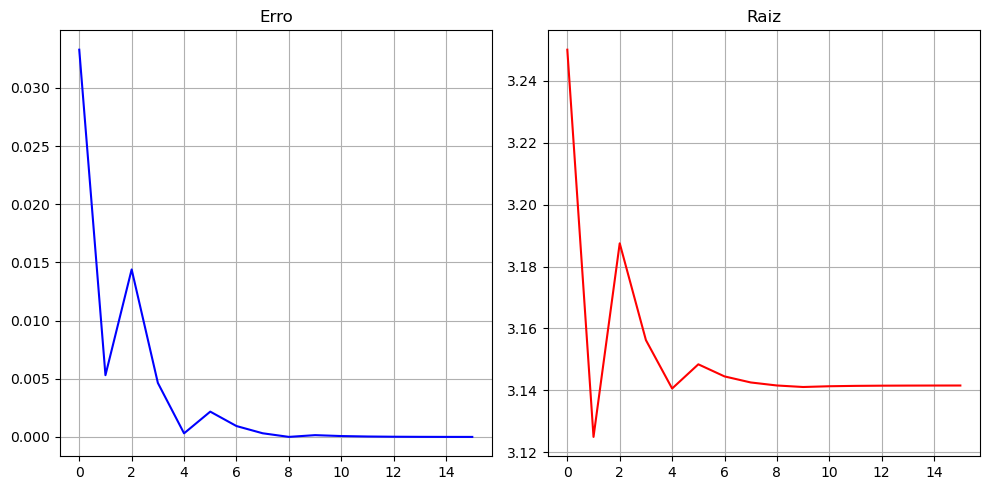

In [751]:
plot(error_biss, values_biss)

# --- MÉTODO DO PONTO FIXO ---

### Intervalo que contêm uma raiz

In [752]:
init    = 6.0
end     = 6.5

### g(x) para encontrar a raiz da função usando o método do ponto fixo

In [753]:
def g(x):
    return x - (math.sin(x)/x)

def g_linha(x):
    return 1 - ((x*math.cos(x) - math.sin(x))/x**2)

### Plotando as funções para verificar a continuidade e que a derivada é menor que 1 no intervalo

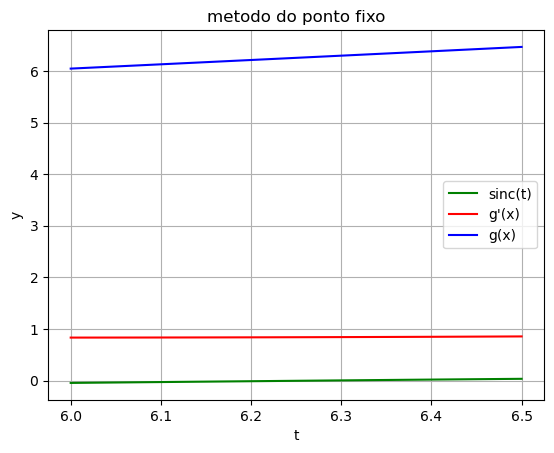

In [754]:
x = np.linspace(init, end, 100)
y0 = [g(i) for i in x]
y1 = [sinc(i) for i in x]
y2 = [g_linha(i) for i in x]

plt.plot(x, y1, 'g')
plt.plot(x, y2, 'r')
plt.plot(x, y0, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.title('metodo do ponto fixo')
plt.grid(True)
plt.legend(['sinc(t)', 'g\'(x)', 'g(x)'])
plt.show()

### Aplicando o método do ponto fixo para achar a raiz

In [755]:
def fixed_point(solution, funtion, funtion_g):
    # zera os arrays
    values_fix = []
    error_fix = []

    for i in range(max_iter):
        # calculo da solucao
        current_solution = funtion_g(solution)
        values_fix.append(current_solution)

        # verificacao de parada
        error_fix.append(abs(funtion(current_solution)))
        if(error_fix[i] < error or abs(current_solution - solution) < converge):
            break

        # atualiza as solucaoes
        solution = current_solution

    return solution, values_fix, error_fix

# chute inicial 
init_value = 6.5
solution_fix, values_fix, error_fix = fixed_point(init_value, sinc, g)

print(f"Aproximado:\t{solution_fix:.15f}")
print(f"Raiz real:\t{r2:.15f}")
print(f"Erro:\t\t{abs(solution_fix - r2):.2e}")
print(f"\nIterações:\t{len(values_fix)}")

Aproximado:	6.283192210886315
Raiz real:	6.283185307179586
Erro:		6.90e-06

Iterações:	61


### Plot do erro e dos valores ao longo das iterações

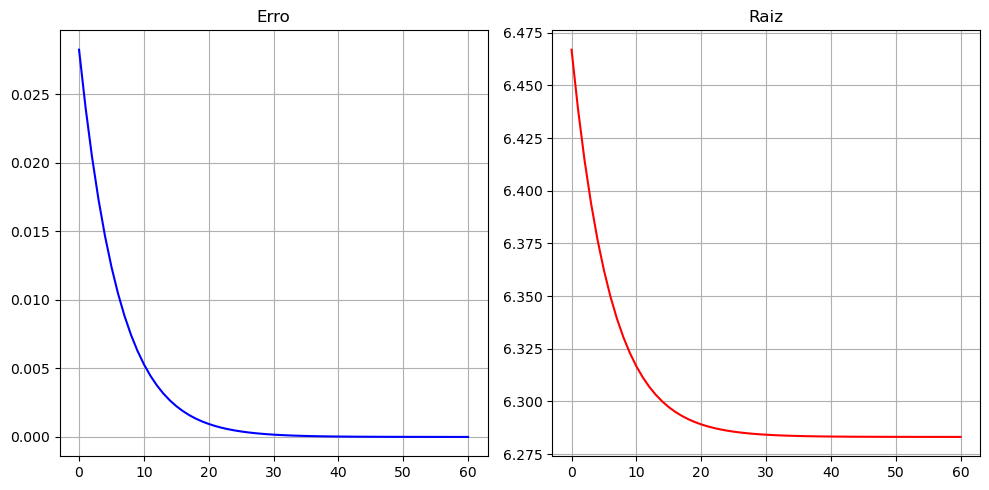

In [756]:
plot(error_fix, values_fix)

# --- MÉTODO DE NEWTON ---

### Chute inicial

In [757]:
initial_new = 3.4

### Aplicando o método de newton para achar a raiz

In [758]:
def newton(solution, funtion, funtion_linha):
    # zera os arays
    values_new = []
    error_new  = []

    for i in range(max_iter):
        # calculo da solucao
        current_solution = solution - (funtion(solution)/funtion_linha(solution))
        values_new.append(current_solution)

        # atualiza as solucaoes
        solution = current_solution

        # verificacao de parada
        error_new.append(abs(funtion(current_solution)))
        if(error_new[i] < error):
            break

    return solution, values_new, error_new

solution_new, values_new, error_new = newton(initial_new, sinc, sinc_linha)

print(f"Aproximado:\t{solution_new:.15f}")
print(f"Raiz real:\t{r1:.15f}")
print(f"Erro:\t\t{abs(solution_new - r1):.2e}")
print(f"\nIterações:\t{len(values_new)}")

Aproximado:	3.141592634392667
Raiz real:	3.141592653589793
Erro:		1.92e-08

Iterações:	3


### Plot do erro e dos valores ao longo das iterações

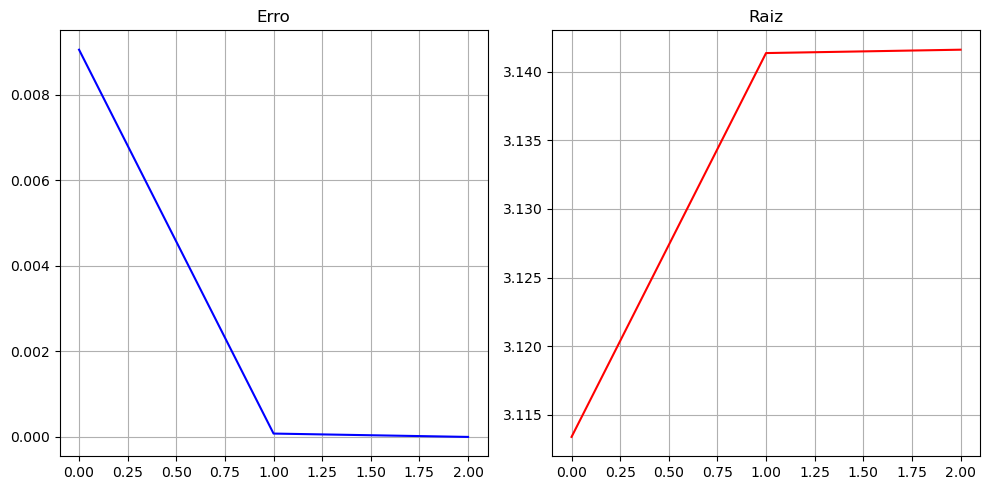

In [763]:
plot(error_new, values_new)

# --- METODO SECANTE ---

### Chute inicial

In [760]:
initial_sec_x0 = 6.0
initial_sec_x1 = 6.5

### Aplicando o método da secante para achar a raiz

In [761]:
def secant(x0, x1, sinc):
    # zera os arrays
    values_sec = []
    error_sec  = []

    # valores iniciais
    f0 = sinc(x0)
    f1 = sinc(x1)

    # troca os valores caso a funcao nao seja decrescente
    if(abs(f1) < abs(f0)):
        x0, x1 = x1, x0
        f0, f1 = f1, f0

    for i in range(max_iter):
        # salva o valor anterior
        values_sec.append(x1)

        # calcula o proximo valor utilizando o metodo que tenta evitar overflow
        s = f1/f0
        p = (x0-x1)*s
        q = 1 - s
        x2 = x1 - p/q

        # verificacao de parada
        error_sec.append(abs(f1))
        if(abs(x1 - x2) < converge or error_sec[i] < error):
            x1 = x2
            break
        
        # atualiza os valores
        f2 = sinc(x2)

        # inverte os valores para a proxima iteracao
        if(abs(f2) > abs(f1)):
            x0, f0 = x2, f2
        else:
            x0, f0 = x1, f1
            x1, f1 = x2, f2

    return x1, values_sec, error_sec

solution_sec, values_sec, error_sec = secant(initial_sec_x0, initial_sec_x1, sinc)

print(f"Aproximado:\t{solution_sec:.15f}")
print(f"Raiz real:\t{r2:.15f}")
print(f"Erro:\t\t{abs(solution_sec - r2):.2e}")
print(f"\nIterações:\t{len(values_sec)}")
    

Aproximado:	6.283185307200048
Raiz real:	6.283185307179586
Erro:		2.05e-11

Iterações:	4


### Plot do erro e dos valores ao longo das iterações

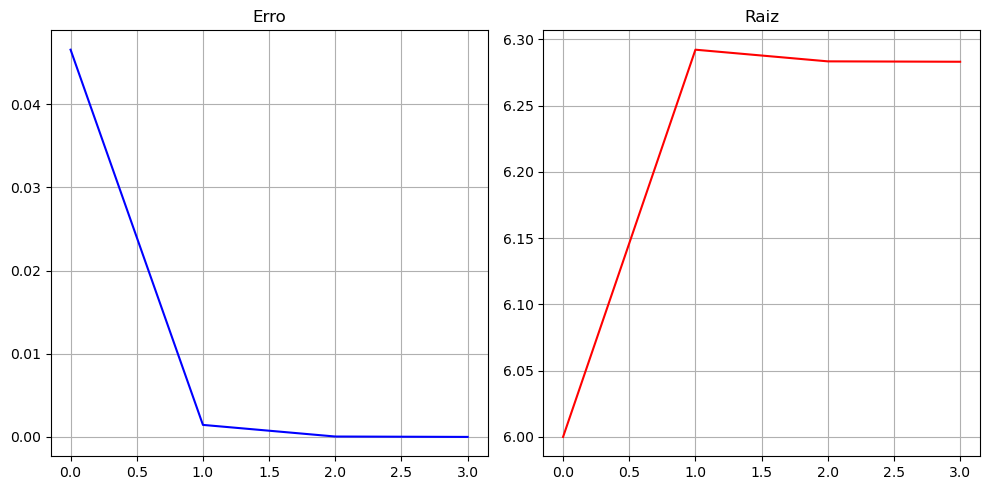

In [762]:
plot(error_new, values_new)